# Microlensing waveform

Trying to reproduce microlensing waveforms. First we try to reproduce the magnification results by Takahashi & Nakamura (2003) & Liao et. al. (2019).

In [2]:
from mpmath import mp
import numpy as np
import matplotlib.pyplot as plt

## Wave optics magnification for PML
Here we basically tries to reproduce the results by Takahashi & Nakamura (2003) for PML

In [3]:
hyp1f1 = np.vectorize(mp.hyp1f1)
gamma = np.vectorize(mp.gamma)
exp = np.vectorize(mp.exp)
pi = np.pi
ln = np.vectorize(mp.log)

In [4]:
def w(f,Ml):
    return 8*np.pi*Ml*f

In [5]:
def xm(y):
    return 0.5*(y+np.sqrt(y**2+4))

In [6]:
def phim(y):
    return (xm(y)-y)**2/2 - np.log(xm(y))

In [7]:
def F(f,y,Ml):
    W = w(f,Ml)
    Phim = phim(y)
    return exp(pi*W/4+(1j*W/2)*(ln(W/2)-2*Phim))*gamma(1-0.5j*W)*hyp1f1(0.5j*W,1,0.5j*W*y*y)

In [13]:
def F2(f,y):
    # Adopting the same convention as Takahashi 
    W = f
    Phim = phim(y)
    return exp(pi*W/4+(1j*W/2)*(ln(W/2)-2*Phim))*gamma(1-0.5j*W)*hyp1f1(0.5j*W,1,0.5j*W*y*y)

In [14]:
f = np.geomspace(0.001,100,5000)

In [15]:
#hyp1f1(a,b,z)

In [16]:
magn = F2(f,0.1).astype(complex)

Text(0.5, 1.0, 'Point mass lens ')

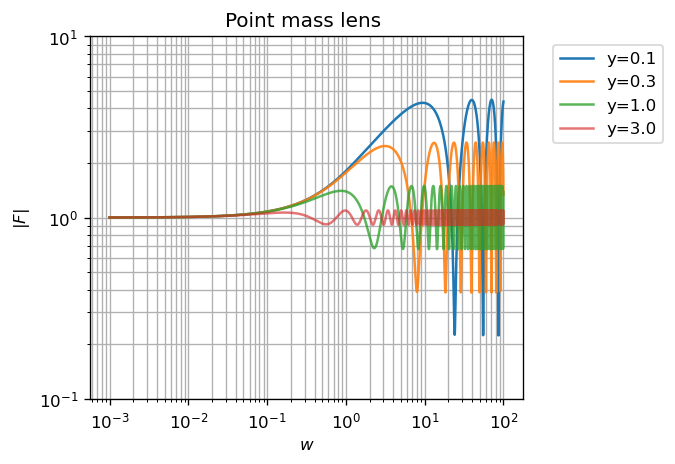

In [17]:
# Takahashi & Nakamura (2003) Fig 2 Panel 1
fig, ax = plt.subplots(dpi=120)
for i,y in enumerate([0.1, 0.3, 1.0, 3.0]):
    f = np.geomspace(0.001,100,5000)
    magn = F2(f,y).astype(complex)
    ax.plot(f,abs(magn),label=f'y={y}',alpha=((5-i)/5)**0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which='major')
ax.grid(which='minor')
ax.set_ylim(0.1,10)
ax.legend(bbox_to_anchor=(1.05,1.0))
ax.set_aspect(2.3)
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$|F|$')
ax.set_title('Point mass lens ')

Text(0.5, 1.0, 'Wave optics magnification for $y=0.1$')

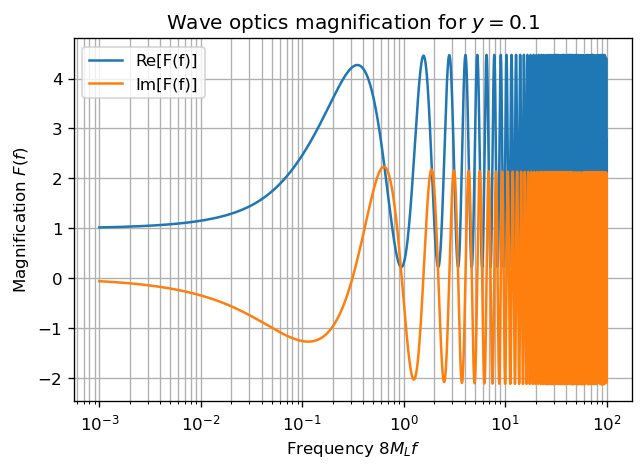

In [20]:
# Plotting the real and imaginary part of the plot abovev for y = 0.1 and using f instead of w
fig, ax = plt.subplots(dpi=120)
y = 0.1
f = np.geomspace(0.001,100,10000)
magn = F(f,y,1).astype(complex)
ax.plot(f,magn.real,label='Re[F(f)]')
ax.plot(f,magn.imag,label='Im[F(f)]')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid(which='major')
ax.grid(which='minor')
#ax.set_ylim(0.1,10)
ax.legend()
#ax.set_aspect(2.3)
ax.set_xlabel(r'Frequency $8M_L f$')
ax.set_ylabel(r'Magnification $F(f)$')
ax.set_title('Wave optics magnification for $y=0.1$')

## Geometric optics magnification

The geometric optics magnification is given in Takahashi & Nakamura (2003) Eq.18:
$$
F_g(f) = |\mu_+|^{1/2} - i|\mu_-|^{1/2} \exp(2\pi i f\Delta t_d)
$$
where $$\mu_\pm = \frac{1}{2} \pm \frac{y^2 + 2}{2y\sqrt{y^2 +4}}$$

$$
\Delta t_d = 4M_L\left[\frac{y\sqrt{y^2+4}}{2} + \ln\left(\frac{\sqrt{y^2 +4}+y}{\sqrt{y^2 +4}-y}\right)\right]
$$

In [22]:
def Fg(f,y,Ml):
    k = np.sqrt(y*y+4)
    mu_p = 0.5 + 0.5*(y*y+2)/(y*k)
    mu_m = 0.5 - 0.5*(y*y+2)/(y*k)
    Delta_td = 4*Ml*(0.5*y*k + np.log((k+y)/(k-y)))
    return np.sqrt(np.abs(mu_p)) - 1j*np.sqrt(np.abs(mu_m))*np.exp(2*np.pi*1j*Delta_td*f)

In [23]:
#Fg(f,0.1)

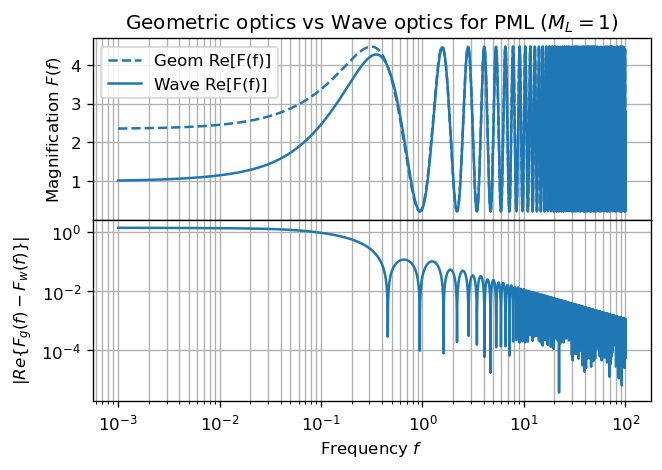

In [30]:
# Plotting the real and imaginary part of the plot abovev for y = 0.1 and using f instead of w
fig, axs = plt.subplots(dpi=120,nrows=2,sharex=True)
y = 0.1
f = np.geomspace(0.001,100,10000)
magn_g = Fg(f,y,1).astype(complex)
magn_w = F(f,y,1).astype(complex)
axs[0].plot(f,magn_g.real,label='Geom Re[F(f)]',color='tab:blue',ls='--')
axs[0].plot(f,magn_w.real,label='Wave Re[F(f)]',color='tab:blue')
#ax.plot(f,magn_g.imag,label='Im[F(f)]')
axs[0].set_xscale('log')
#ax.set_yscale('log')
axs[0].grid(which='major')
axs[0].grid(which='minor')
#ax.set_ylim(0.1,10)
axs[0].legend()

axs[1].plot(f,np.abs(magn_g.real-magn_w.real))
axs[1].set_yscale('log')
axs[1].grid(which='minor')
axs[1].grid(which='major')


#fig.set_xlabel('F')
#ax.set_aspect(2.3)
axs[1].set_xlabel(r'Frequency $f$')
axs[0].set_ylabel(r'Magnification $F(f)$')
axs[1].set_ylabel(r'$|Re\{F_g(f)-F_w(f)\}|$')
axs[0].set_title('Geometric optics vs Wave optics for PML ($M_L=1$)')
#ax.set_title('Wave optics magnification for $y=0.1$')
fig.subplots_adjust(hspace=0)


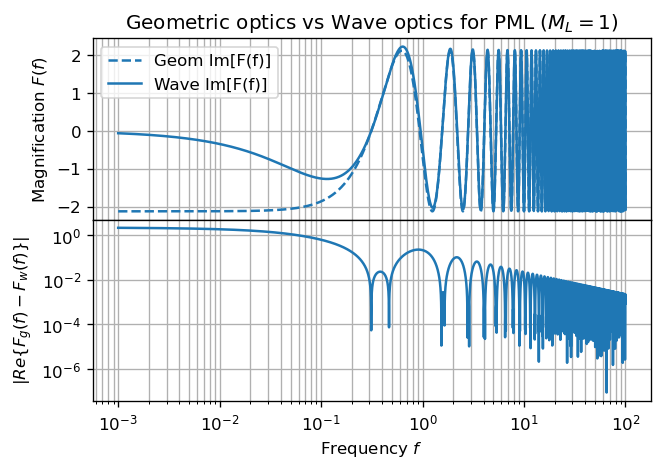

In [31]:
# Plotting the real and imaginary part of the plot abovev for y = 0.1 and using f instead of w
fig, axs = plt.subplots(dpi=120,nrows=2,sharex=True)
y = 0.1
f = np.geomspace(0.001,100,10000)
magn_g = Fg(f,y,1).astype(complex)
magn_w = F(f,y,1).astype(complex)
axs[0].plot(f,magn_g.imag,label='Geom Im[F(f)]',color='tab:blue',ls='--')
axs[0].plot(f,magn_w.imag,label='Wave Im[F(f)]',color='tab:blue')
#ax.plot(f,magn_g.imag,label='Im[F(f)]')
axs[0].set_xscale('log')
#ax.set_yscale('log')
axs[0].grid(which='major')
axs[0].grid(which='minor')
#ax.set_ylim(0.1,10)
axs[0].legend()

axs[1].plot(f,np.abs(magn_g.imag-magn_w.imag))
axs[1].set_yscale('log')
axs[1].grid(which='minor')
axs[1].grid(which='major')


#fig.set_xlabel('F')
#ax.set_aspect(2.3)
axs[1].set_xlabel(r'Frequency $f$')
axs[0].set_ylabel(r'Magnification $F(f)$')
axs[1].set_ylabel(r'$|Re\{F_g(f)-F_w(f)\}|$')
axs[0].set_title('Geometric optics vs Wave optics for PML ($M_L=1$)')
#ax.set_title('Wave optics magnification for $y=0.1$')
fig.subplots_adjust(hspace=0)
